In [119]:
DF_PATH       = "../data/processed/2_cleaned_data.pkl"
FEATURES_PATH = "../data/processed/features_skills_clusters_counts.pkl"

ROLE_COLS      = ['DevType']
TECH_COLS      = ['LanguageWorkedWith',    'DatabaseWorkedWith',    'WebframeWorkedWith',    'MiscTechWorkedWith']

EXPORT_PATH = '../models/00_model_baseline.pkl'


In [108]:
# Load packages
import pandas as pd 
import numpy as np
import pickle
import logging
import random
import plotly
import os

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler, minmax_scale, RobustScaler
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.feature_selection import VarianceThreshold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

from sklearn.decomposition import PCA, KernelPCA

from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt

In [12]:
df = pd.read_pickle(DF_PATH)
df = df.drop("skills_clusters",axis=1).copy()


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [17]:
df['DevType'].columns

Index(['Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'DevOps specialist', 'Developer, QA or test',
       'Developer, back-end', 'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Engineer, data', 'Scientist',
       'System administrator'],
      dtype='object')

In [110]:
def generate_columns_data(role_name):
    '''Generate balance data for singel job'''
    
    role_mask = (df['DevType'][role_name]==1)
    
    role = df[role_mask].index.to_series()
    another_role = df[~role_mask].index.to_series()
    print(len(role))
    sample_size = len(role)
    if len(another_role) > sample_size:
#         print(len(another_role))
        another_role = another_role.sample(sample_size).copy()
#         print(len(another_role))
    
    all_index = role.tolist() + another_role.tolist()
    role_df = df.loc[all_index].copy()
    bin_role = role_df['DevType'][role_name]
    skills = role_df.drop('DevType', axis=1).droplevel(0, axis=1).copy()
    return skills,bin_role
        

In [103]:
model_df = generate_rcolumns_data('Data or business analyst')

669


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [105]:
model_df[1].value_counts()

1    669
0    669
Name: Data or business analyst, dtype: int64

In [127]:
roles

['Academic researcher',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'DevOps specialist',
 'Developer, QA or test',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, embedded applications or devices',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Developer, mobile',
 'Engineer, data',
 'Scientist',
 'System administrator']

In [109]:
roles = df['DevType'].columns.tolist()

In [112]:
models = {}

for role in roles:
    
    skills,bin_role = generate_columns_data(role)
    X_train, X_test, y_train, y_test = train_test_split(skills, bin_role, random_state=0)
    
    role_clf = tree.DecisionTreeClassifier()
    role_clf.fit(X_train, y_train)
    
    score_train = precision_score(y_train, role_clf.predict(X_train))
    score_test = precision_score(y_test, role_clf.predict(X_test))
    
    models[role] = {'clf': role_clf, 'scores': [score_train, score_test]}

581
669
799
296

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=le


677
493


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


5503
1671
795
2890


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


5578


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


342
1859
483

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)



292
440

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)
C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [113]:
pd.DataFrame(models).T

,clf,scores
Academic researcher,DecisionTreeClassifier(),"[0.9887387387387387, 0.6482758620689655]"
Data or business analyst,DecisionTreeClassifier(),"[1.0, 0.7468354430379747]"
Data scientist or machine learning specialist,DecisionTreeClassifier(),"[1.0, 0.8241206030150754]"
Database administrator,DecisionTreeClassifier(),"[0.9955156950672646, 0.6363636363636364]"
DevOps specialist,DecisionTreeClassifier(),"[1.0, 0.6705202312138728]"
"Developer, QA or test",DecisionTreeClassifier(),"[1.0, 0.5677966101694916]"
"Developer, back-end",DecisionTreeClassifier(),"[0.9888998519980267, 0.6570370370370371]"
"Developer, desktop or enterprise applications",DecisionTreeClassifier(),"[0.9855653568564555, 0.6255924170616114]"
"Developer, embedded applications or devices",DecisionTreeClassifier(),"[0.9931740614334471, 0.7696078431372549]"
"Developer, front-end",DecisionTreeClassifier(),"[0.99074502545118, 0.7366255144032922]"


581


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


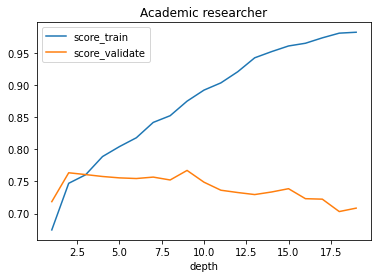

669


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


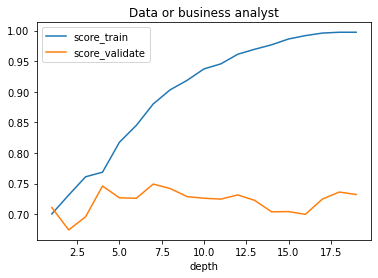

799


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


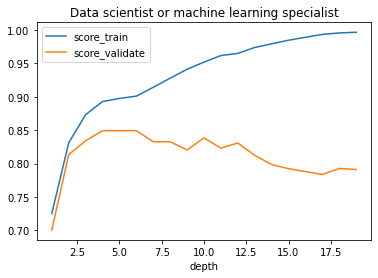

296


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


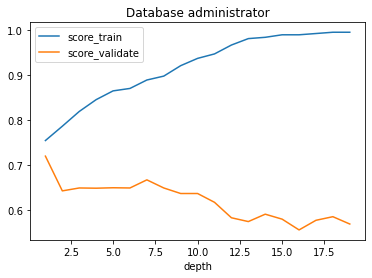

677


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


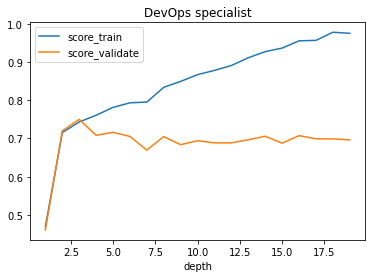

493


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


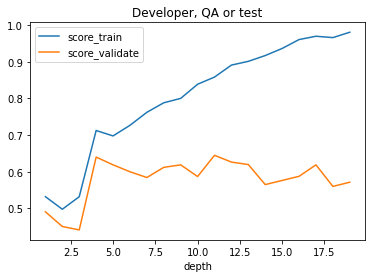

5503


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


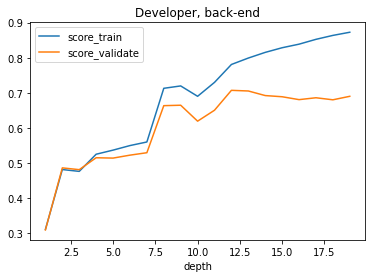

1671


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


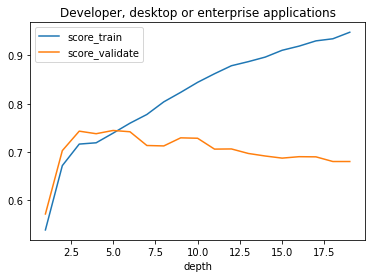

795


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


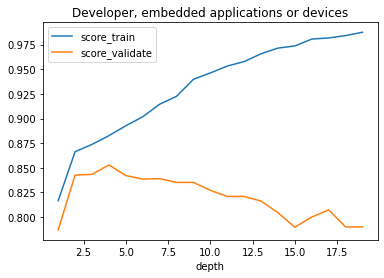

2890


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


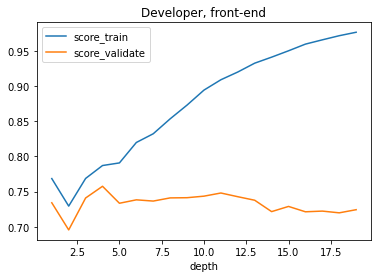

5578


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


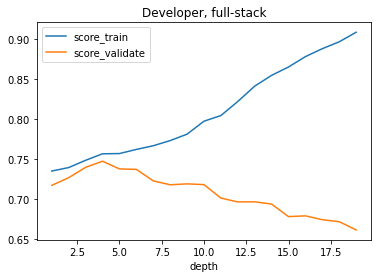

342


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


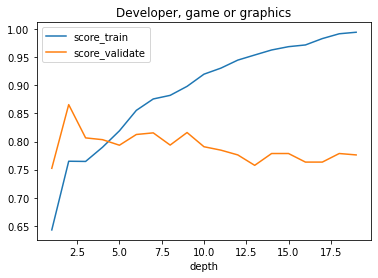

1859


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


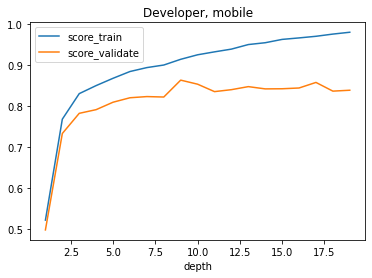

483


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


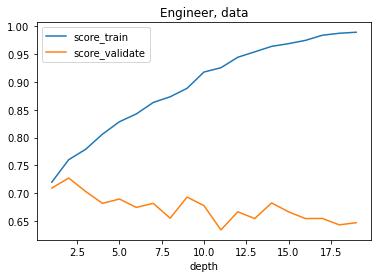

292


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


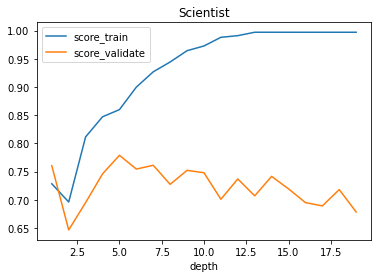

440


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


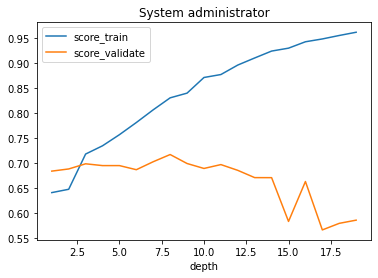

In [114]:
for role in roles:
    
    skills,bin_role = generate_columns_data(role)
    X_train, X_test, y_train, y_test = train_test_split(skills, bin_role, random_state=0)
    X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, random_state=0)
    
    hpt = []
    for depth in range(1,20):
        role_clf = tree.DecisionTreeClassifier(max_depth=depth)
        role_clf.fit(X_train, y_train)

        score_train = f1_score(y_train, role_clf.predict(X_train))
        score_validate = f1_score(y_validate, role_clf.predict(X_validate))

        hpt.append([depth,score_train,score_validate])
    
    hpt = pd.DataFrame(hpt, columns=['depth', 'score_train', 'score_validate']).set_index('depth')
    
    hpt.plot(title = role)
    plt.show()
    

In [118]:
models = {}

for role in roles:
    
    skills,bin_role = generate_columns_data(role)
    X_train, X_test, y_train, y_test = train_test_split(skills, bin_role, random_state=0)
    X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, random_state=0)
    
    best_model = None
    best_validate = -np.inf
    for depth in range(1,20):
        role_clf = tree.DecisionTreeClassifier(max_depth=depth)
        role_clf.fit(X_train, y_train)

        score_train = f1_score(y_train, role_clf.predict(X_train))
        score_validate = f1_score(y_validate, role_clf.predict(X_validate))
        if score_validate > best_validate:
            best_validate = score_validate
            best_model = role_clf

    score_train = f1_score(y_train, role_clf.predict(X_train))
    score_validate = f1_score(y_validate, role_clf.predict(X_validate))
    score_test = f1_score(y_test, role_clf.predict(X_test))
    models[role] = {'model': best_model,
                   'data': {'X':skills, 'y': bin_role},
                   'score': {'test': score_test, 
                             'train': score_train, 
                             'validate': score_validate}
        
    }           
    
    
    print("**********************")
    print(role)
    print(tree.export_text(best_model,feature_names=X_train.columns.tolist()))
    print('-------------------------------')

581


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Academic researcher
|--- Python <= 0.50
|   |--- C <= 0.50
|   |   |--- R <= 0.50
|   |   |   |--- C++ <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- C++ >  0.50
|   |   |   |   |--- class: 1
|   |   |--- R >  0.50
|   |   |   |--- Node.js <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Node.js >  0.50
|   |   |   |   |--- class: 0
|   |--- C >  0.50
|   |   |--- SQLite <= 0.50
|   |   |   |--- Oracle <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Oracle >  0.50
|   |   |   |   |--- class: 0
|   |   |--- SQLite >  0.50
|   |   |   |--- Bash/Shell/PowerShell <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Bash/Shell/PowerShell >  0.50
|   |   |   |   |--- class: 1
|--- Python >  0.50
|   |--- R <= 0.50
|   |   |--- C++ <= 0.50
|   |   |   |--- Redis <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Redis >  0.50
|   |   |   |   |--- class: 0
|   |   |--- C++ >  0.50
|   |   |   |--- Angular.js <= 0.50
|   |   |   |   |--- class: 

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Data or business analyst
|--- Pandas <= 0.50
|   |--- SQL <= 0.50
|   |   |--- VBA <= 0.50
|   |   |   |--- Oracle <= 0.50
|   |   |   |   |--- MariaDB <= 0.50
|   |   |   |   |   |--- IBM DB2 <= 0.50
|   |   |   |   |   |   |--- Keras <= 0.50
|   |   |   |   |   |   |   |--- R <= 0.50
|   |   |   |   |   |   |   |   |--- Microsoft SQL Server <= 0.50
|   |   |   |   |   |   |   |   |   |--- HTML/CSS <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- React.js <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- React.js >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- HTML/CSS >  0.50
|   |   |   |   |   |   |   |   |   |   |--- Dart <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- Dart >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Data scientist or machine learning specialist
|--- Pandas <= 0.50
|   |--- R <= 0.50
|   |   |--- TensorFlow <= 0.50
|   |   |   |--- Python <= 0.50
|   |   |   |   |--- C++ <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- C++ >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- Python >  0.50
|   |   |   |   |--- Torch/PyTorch <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Torch/PyTorch >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- TensorFlow >  0.50
|   |   |   |--- Angular.js <= 0.50
|   |   |   |   |--- C <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- C >  0.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Angular.js >  0.50
|   |   |   |   |--- Kotlin <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Kotlin >  0.50
|   |   |   |   |   |--- class: 0
|   |--- R >  0.50
|   |   |--- Ruby <= 0.50
|   |   |   |--- Gatsby <= 0.50
|   |   |   |   |--- SQLite <= 0.50
|   |   |   |   |   |

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Database administrator
|--- SQL <= 0.50
|   |--- class: 0
|--- SQL >  0.50
|   |--- class: 1

-------------------------------
677


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
DevOps specialist
|--- Teraform <= 0.50
|   |--- Ansible <= 0.50
|   |   |--- Bash/Shell/PowerShell <= 0.50
|   |   |   |--- class: 0
|   |   |--- Bash/Shell/PowerShell >  0.50
|   |   |   |--- class: 1
|   |--- Ansible >  0.50
|   |   |--- Angular.js <= 0.50
|   |   |   |--- class: 1
|   |   |--- Angular.js >  0.50
|   |   |   |--- class: 0
|--- Teraform >  0.50
|   |--- Dart <= 0.50
|   |   |--- Gatsby <= 0.50
|   |   |   |--- class: 1
|   |   |--- Gatsby >  0.50
|   |   |   |--- class: 0
|   |--- Dart >  0.50
|   |   |--- class: 0

-------------------------------
493


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Developer, QA or test
|--- Java <= 0.50
|   |--- TypeScript <= 0.50
|   |   |--- Express <= 0.50
|   |   |   |--- SQL <= 0.50
|   |   |   |   |--- Keras <= 0.50
|   |   |   |   |   |--- ASP.NET Core <= 0.50
|   |   |   |   |   |   |--- C# <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- C# >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- ASP.NET Core >  0.50
|   |   |   |   |   |   |--- Microsoft SQL Server <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Microsoft SQL Server >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Keras >  0.50
|   |   |   |   |   |--- SQLite <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- SQLite >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- SQL >  0.50
|   |   |   |   |--- VBA <= 0.50
|   |   |   |   |   |--- MariaDB <= 0.50
|   |   |   |   |   |   |--- ASP.NET <= 0.50
|   |   |   |   |   |

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Developer, back-end
|--- Spring <= 0.50
|   |--- Redis <= 0.50
|   |   |--- React.js <= 0.50
|   |   |   |--- Firebase <= 0.50
|   |   |   |   |--- R <= 0.50
|   |   |   |   |   |--- Objective-C <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Objective-C >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- R >  0.50
|   |   |   |   |   |--- MongoDB <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- MongoDB >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Firebase >  0.50
|   |   |   |   |--- JavaScript <= 0.50
|   |   |   |   |   |--- Go <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Go >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- JavaScript >  0.50
|   |   |   |   |   |--- Ruby on Rails <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Ruby on Rails >  0.50
|   |   |   |   |   |   |--- class: 1
|   |   |--- React.js >  0.50
| 

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Developer, desktop or enterprise applications
|--- C# <= 0.50
|   |--- C++ <= 0.50
|   |   |--- Java <= 0.50
|   |   |   |--- JavaScript <= 0.50
|   |   |   |   |--- .NET <= 0.50
|   |   |   |   |   |--- Rust <= 0.50
|   |   |   |   |   |   |--- IBM DB2 <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- IBM DB2 >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Rust >  0.50
|   |   |   |   |   |   |--- Scala <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Scala >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- .NET >  0.50
|   |   |   |   |   |--- Unity 3D <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Unity 3D >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- JavaScript >  0.50
|   |   |   |   |--- C <= 0.50
|   |   |   |   |   |--- ASP.NET Core <= 0.50
|   |   |   |   |   |   |--- Oracle <= 0.50
|   |   |   |   |   |   |  

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Developer, embedded applications or devices
|--- C <= 0.50
|   |--- C++ <= 0.50
|   |   |--- JavaScript <= 0.50
|   |   |   |--- Rust <= 0.50
|   |   |   |   |--- Torch/PyTorch <= 0.50
|   |   |   |   |   |--- Drupal <= 0.50
|   |   |   |   |   |   |--- Firebase <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Firebase >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Drupal >  0.50
|   |   |   |   |   |   |--- Microsoft SQL Server <= 0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Microsoft SQL Server >  0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Torch/PyTorch >  0.50
|   |   |   |   |   |--- PostgreSQL <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- PostgreSQL >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Rust >  0.50
|   |   |   |   |--- Python <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Python >

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Developer, front-end
|--- JavaScript <= 0.50
|   |--- HTML/CSS <= 0.50
|   |   |--- Firebase <= 0.50
|   |   |   |--- Objective-C <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Objective-C >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Firebase >  0.50
|   |   |   |--- Angular.js <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Angular.js >  0.50
|   |   |   |   |--- class: 1
|   |--- HTML/CSS >  0.50
|   |   |--- Bash/Shell/PowerShell <= 0.50
|   |   |   |--- Angular <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Angular >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Bash/Shell/PowerShell >  0.50
|   |   |   |--- Swift <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Swift >  0.50
|   |   |   |   |--- class: 1
|--- JavaScript >  0.50
|   |--- SQL <= 0.50
|   |   |--- HTML/CSS <= 0.50
|   |   |   |--- React.js <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- React.js >  0.50
|   |   |   |   |--- class: 1
|   |   |--- HTML

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Developer, full-stack
|--- JavaScript <= 0.50
|   |--- TypeScript <= 0.50
|   |   |--- class: 0
|   |--- TypeScript >  0.50
|   |   |--- class: 1
|--- JavaScript >  0.50
|   |--- SQL <= 0.50
|   |   |--- class: 1
|   |--- SQL >  0.50
|   |   |--- class: 1

-------------------------------
342


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Developer, game or graphics
|--- Unity 3D <= 0.50
|   |--- C++ <= 0.50
|   |   |--- SQL <= 0.50
|   |   |   |--- class: 0
|   |   |--- SQL >  0.50
|   |   |   |--- class: 0
|   |--- C++ >  0.50
|   |   |--- Unreal Engine <= 0.50
|   |   |   |--- class: 1
|   |   |--- Unreal Engine >  0.50
|   |   |   |--- class: 1
|--- Unity 3D >  0.50
|   |--- Dart <= 0.50
|   |   |--- Ruby on Rails <= 0.50
|   |   |   |--- class: 1
|   |   |--- Ruby on Rails >  0.50
|   |   |   |--- class: 0
|   |--- Dart >  0.50
|   |   |--- class: 0

-------------------------------
1859


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Developer, mobile
|--- Swift <= 0.50
|   |--- Kotlin <= 0.50
|   |   |--- Firebase <= 0.50
|   |   |   |--- Xamarin <= 0.50
|   |   |   |   |--- Dart <= 0.50
|   |   |   |   |   |--- React Native <= 0.50
|   |   |   |   |   |   |--- Cordova <= 0.50
|   |   |   |   |   |   |   |--- Unity 3D <= 0.50
|   |   |   |   |   |   |   |   |--- Java <= 0.50
|   |   |   |   |   |   |   |   |   |--- Objective-C <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Objective-C >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Java >  0.50
|   |   |   |   |   |   |   |   |   |--- SQLite <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- SQLite >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Unity 3D >  0.50
|   |   |   |   |   |   |   |   |--- JavaScript <= 0.50
|   |   |   |   |   | 

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Engineer, data
|--- Python <= 0.50
|   |--- Apache Spark <= 0.50
|   |   |--- class: 0
|   |--- Apache Spark >  0.50
|   |   |--- class: 1
|--- Python >  0.50
|   |--- Apache Spark <= 0.50
|   |   |--- class: 1
|   |--- Apache Spark >  0.50
|   |   |--- class: 1

-------------------------------
292


C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
Scientist
|--- Python <= 0.50
|   |--- R <= 0.50
|   |   |--- C <= 0.50
|   |   |   |--- Assembly <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Assembly >  0.50
|   |   |   |   |--- class: 1
|   |   |--- C >  0.50
|   |   |   |--- SQL <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- SQL >  0.50
|   |   |   |   |--- class: 0
|   |--- R >  0.50
|   |   |--- Oracle <= 0.50
|   |   |   |--- class: 1
|   |   |--- Oracle >  0.50
|   |   |   |--- class: 0
|--- Python >  0.50
|   |--- PostgreSQL <= 0.50
|   |   |--- Vue.js <= 0.50
|   |   |   |--- DynamoDB <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- DynamoDB >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Vue.js >  0.50
|   |   |   |--- class: 0
|   |--- PostgreSQL >  0.50
|   |   |--- R <= 0.50
|   |   |   |--- Pandas <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Pandas >  0.50
|   |   |   |   |--- class: 1
|   |   |--- R >  0.50
|   |   |   |--- Node.js <= 0.50
|   |   |   |   |---

C:\Users\oem\anaconda3\anacond_3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


**********************
System administrator
|--- Bash/Shell/PowerShell <= 0.50
|   |--- HTML/CSS <= 0.50
|   |   |--- Go <= 0.50
|   |   |   |--- class: 0
|   |   |--- Go >  0.50
|   |   |   |--- class: 1
|   |--- HTML/CSS >  0.50
|   |   |--- React.js <= 0.50
|   |   |   |--- class: 1
|   |   |--- React.js >  0.50
|   |   |   |--- class: 0
|--- Bash/Shell/PowerShell >  0.50
|   |--- Java <= 0.50
|   |   |--- JavaScript <= 0.50
|   |   |   |--- class: 1
|   |   |--- JavaScript >  0.50
|   |   |   |--- class: 1
|   |--- Java >  0.50
|   |   |--- Go <= 0.50
|   |   |   |--- class: 0
|   |   |--- Go >  0.50
|   |   |   |--- class: 1

-------------------------------


In [123]:
os.makedirs(os.path.dirname(EXPORT_PATH), exist_ok=  True)

with open (EXPORT_PATH,'wb') as handel:
    
    pickle.dump(models,handel)

In [124]:
models.keys()

dict_keys(['Academic researcher', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'DevOps specialist', 'Developer, QA or test', 'Developer, back-end', 'Developer, desktop or enterprise applications', 'Developer, embedded applications or devices', 'Developer, front-end', 'Developer, full-stack', 'Developer, game or graphics', 'Developer, mobile', 'Engineer, data', 'Scientist', 'System administrator'])